Autor: Jose Guillermo Gordillo Lopez 

Carnet:  23003971

In [3]:
import cv2 #importamos opencv
import numpy as np
import matplotlib.pyplot as plt

<ins>**Problema 1:**</ins>
Desarrolle una funcion la cual reciba dos parametros, una imagen y un entero llamado color, la
funcion debe devolver una imagen la cual tenga activos los canales de color segun los siguientes
puntos:

* Si el parametro color vale 1, la imagen debe mostrar activos unicamente el color azul.
* Si el parametro color vale 2, la imagen debe mostrar activos unicamente el color verde.
* Si el parametro color vale 3, la imagen debe mostrar activos unicamente el color rojo.
* Si el parametro color vale 10, la imagen debe mostrar activos unicamente los colores rojo y
verde.
* Si el parametro color vale 20, la imagen debe mostrar activos unicamente los colores verde y
azul.
* Si el parametro color vale 30, la imagen debe mostrar activos unicamente los colores azul y
rojo.

In [4]:
def aplicar_color(imagen, color):    
    img=cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB) # Convertimos imagen a formato RGB
    alto= img.shape[0]
    ancho = img.shape[1]


    img_salida = np.zeros_like(img) # creamos lienzo para imagen de salida

    for i in range(0,alto):
        for j in range(0,ancho):
            pixel= img[i,j]

            red= pixel[0]
            green= pixel[1]
            blue= pixel[2]


            img_salida[i,j] = [0,green,blue]

            if color == 1:
            # Solo azul            
                img_salida[i,j] = [0,0,blue]                
            elif color == 2:
                # Solo verde
                img_salida[i,j] = [0,green,0]
            elif color == 3:
                # Solo rojo
                img_salida[i,j] = [red,0,0]
            elif color == 10:
                # Rojo y verde
                img_salida[i,j] = [red,green,0] 
            elif color == 20:
                # Verde y azul 
                img_salida[i,j] = [0,green,blue]  
            elif color == 30:
                # Azul y rojo
                img_salida[i,j] = [red,0,blue]   
    
    return img_salida


In [5]:
imagen = cv2.imread('dragon.jpg')  # Lee la imagen en formato BGR
color = 30  # Ejemplo de valor de color
imagen_modificada = aplicar_color(imagen, color)

<function matplotlib.pyplot.show(close=None, block=None)>

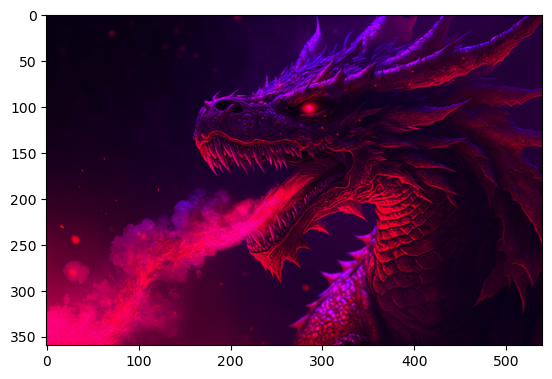

In [6]:
plt.imshow(imagen_modificada)
plt.show

<ins>**Problema 2:**</ins>
En el .zip del laboratorio se le compartio un conjunto de imagenes en escala de grises (imagen1,
imagen2, perro) estas imagenes fueron creadas utilizando una escala de grises en 3D, cree una
funcion que dadas las 3 imagenes se construya la imagen original a color.

In [17]:
def combinar_grayscale_a_color(image_paths, output_path):
    # Cargar las imágenes en escala de grises
    images = [cv2.imread(path, cv2.IMREAD_GRAYSCALE) for path in image_paths]

    # Verificar que se han cargado exactamente 3 imágenes
    if len(images) != 3:
        raise ValueError("Se deben proporcionar exactamente 3 imágenes en escala de grises.")
    
    # Verificar que todas las imágenes tienen el mismo tamaño
    if not all(img.shape == images[0].shape for img in images):
        raise ValueError("Todas las imágenes deben tener el mismo tamaño.")
    
        
    # Combinar las imágenes en un solo array con tres canales
    color_image = cv2.merge(images)
    
    # Guardar la imagen combinada
    cv2.imwrite(output_path, color_image)
     

In [18]:
image_paths = ['imagen1/imagen1_salida_gray_azul.jpg','imagen1/imagen1_salida_gray_verde.jpg', 'imagen1/imagen1_salida_gray_rojo.jpg', ]
output_path = 'imagen1/imagen_combinada.png'
combinar_grayscale_a_color(image_paths, output_path)

In [19]:
image_paths = ['imagen2/imagen2_salida_gray_azul.jpg','imagen2/imagen2_salida_gray_verde.jpg','imagen2/imagen2_salida_gray_rojo.jpg']
output_path = 'imagen2/imagen2_combinada.png'
combinar_grayscale_a_color(image_paths, output_path)

In [20]:
image_paths = ['perro/perro_salida_gray_azul.jpg','perro/perro_salida_gray_verde.jpg', 'perro/perro_salida_gray_rojo.jpg']
output_path = 'perro/perro_combinada.png'
combinar_grayscale_a_color(image_paths, output_path)

<ins>**Problema 3:**</ins>
Cree una funcion que dada una imagen cree una escala de grises en tres dimensiones, tome en
cuenta que su funcion debe crear 3 imagenes como salida. Para entregar este ejercicio debe incluir
una las imagenes que haya utilizado como prueba y el resultado de las misma, no puede utilizar la
imagen del Problema #2.

In [21]:

def crear_escala_grises_3D(image_path, output_paths):
    # Cargar la imagen a color
    color_image = cv2.imread(image_path)
    
    # Verificar que la imagen se ha cargado correctamente
    if color_image is None:
        raise ValueError(f"No se pudo cargar la imagen en la ruta: {image_path}")
    
    # Separar los canales de color
    canal_azul, canal_verde, canal_rojo = cv2.split(color_image)
    
    # Guardar cada canal como una imagen en escala de grises
    cv2.imwrite(output_paths[0], canal_azul)
    cv2.imwrite(output_paths[1], canal_verde)
    cv2.imwrite(output_paths[2], canal_rojo)
     

In [22]:
# Ejemplo de uso
image_path = 'Problema3/dragon.jpg'
output_paths = ['Problema3/dragon_azul.jpg', 'Problema3/dragon_verde.jpg', 'Problema3/dragon_rojo.jpg']
crear_escala_grises_3D(image_path, output_paths)

<ins>**Problema 4:**</ins>
Cree una funcion que dada una imagen, muestre el histograma de cada canal de color y el de
escala de grises (utilice un promedio aritmetico para su escala de grises, no puede usar funciones
de opencv), sus histogramas deben incluir una linea vertical la cual muestre el valor de la media
de la distribucion.

In [24]:
def plot_histograma_colores(canal, titulo, color, ax):
    hist = np.histogram(canal, bins=256, range=(0, 256))[0]
    mean_value = np.mean(canal)
    
    ax.plot(hist, color=color)
    ax.axvline(mean_value, color=color, linestyle='dashed', linewidth=1)
    ax.set_title(f'Histograma del canal {titulo}')
    ax.set_xlim([0, 256])

In [25]:
def histograma_colores(image_path):
      # Cargar la imagen a color
    color_image = cv2.imread(image_path)

    red = []
    green = []
    blue = []
    gris = []
    
    # Verificar que la imagen se ha cargado correctamente
    if color_image is None:
        raise ValueError(f"No se pudo cargar la imagen en la ruta: {image_path}")
    
    alto= color_image.shape[0]
    ancho = color_image.shape[1]

    for i in range(0,alto):
        for j in range(0,ancho):
                pixel= color_image[i,j]

                blue.append(pixel[0])
                green.append(pixel[1])
                red.append(pixel[2])
                #Escala de Grises con la Media Ponderada
                #gris.append((pixel[2]*0.3)+(pixel[1]*0.59)+(pixel[0]*0.11)) 
                #gris.append(round(((pixel[2]+pixel[1]+pixel[0])/3),0)) 
                gris.append(((pixel[2]+pixel[1]+pixel[0])/3))

    # Crear subplots para mostrar los histogramas
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))

    # Plotear histogramas para cada canal de color
    plot_histograma_colores(blue, 'Azul', 'b', axs[0, 0])
    plot_histograma_colores(green, 'Verde', 'g', axs[0, 1])
    plot_histograma_colores(red, 'Rojo', 'r', axs[1, 0])
    
    # Plotear histograma para la imagen en escala de grises
    plot_histograma_colores(gris, 'Gris', 'k', axs[1, 1])
    
    plt.tight_layout()
    plt.show()           

C:\Users\jggl_\AppData\Local\Temp\ipykernel_1480\483864637.py:27: RuntimeWarning: overflow encountered in scalar add
  gris.append(((pixel[2]+pixel[1]+pixel[0])/3))


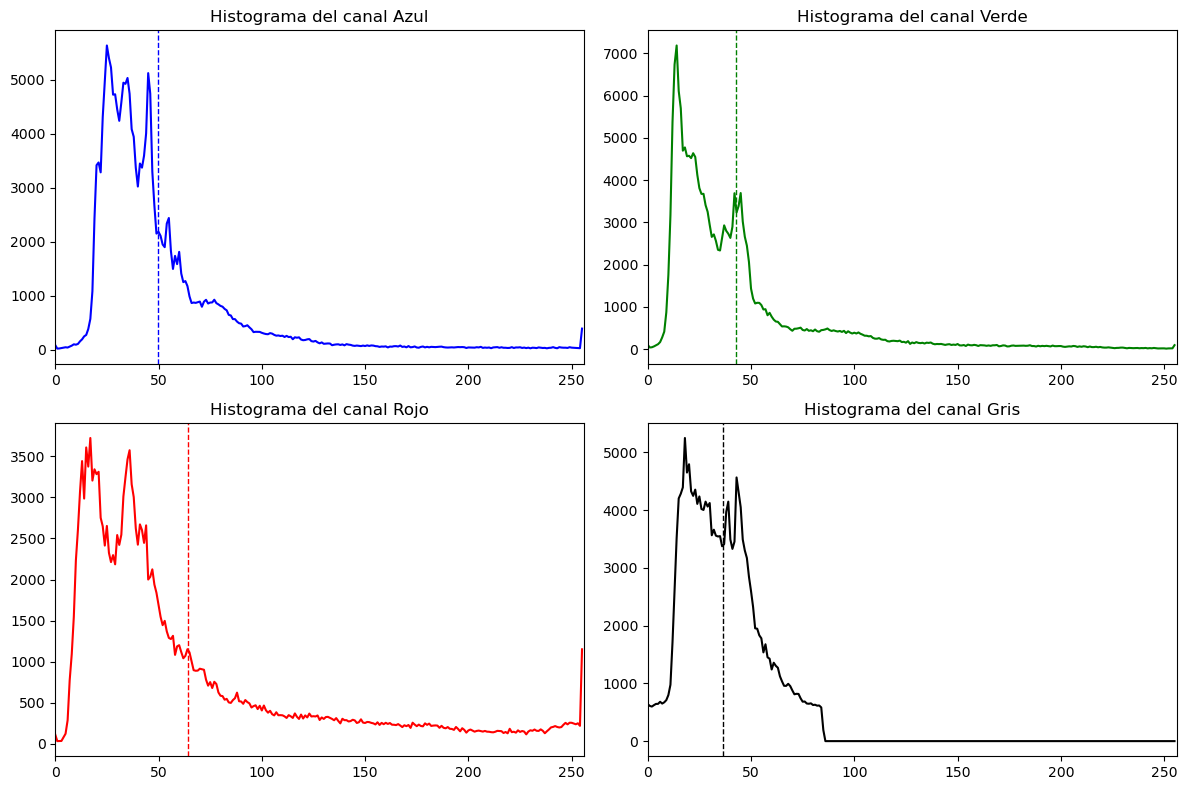

In [28]:
# Ejemplo de uso
image_path = 'dragon.jpg'
histograma_colores(image_path)

<ins>**Problema 5:**</ins>
Investigue en que consiste el enfoque de escala de grises ponderado, luego de esto implemente una
funcion que dada una imagen, realice una escala de grises ponderada (notar que no existe una
solucion unica).

In [29]:
def escala_gris_ponderado(image_path):
      # Cargar la imagen a color
    color_image = cv2.imread(image_path)
 
    # Verificar que la imagen se ha cargado correctamente
    if color_image is None:
        raise ValueError(f"No se pudo cargar la imagen en la ruta: {image_path}")
    
    alto= color_image.shape[0]
    ancho = color_image.shape[1]

    img_salida = np.zeros_like(color_image)


    for i in range(0,alto):
        for j in range(0,ancho):
                pixel= color_image[i,j]

                blue = pixel[0]
                green = pixel[1]
                red = pixel[2]
                #Escala de Grises con la Media Ponderada
                                 
                gris= (red*0.3)+(green*0.59)+(blue*0.11)  

                img_salida[i,j] = [gris,gris,gris]
    
    plt.imshow(img_salida)
    plt.show

     

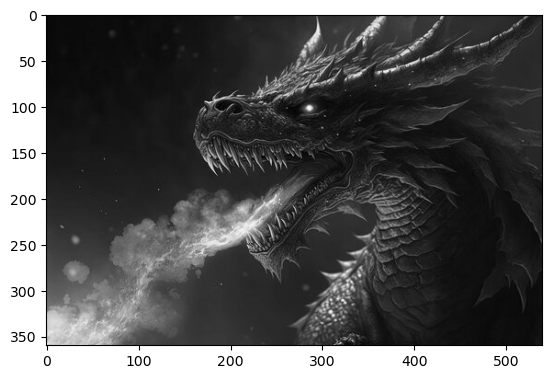

In [30]:
image_path = 'dragon.jpg'
escala_gris_ponderado(image_path)

<ins>**Problema 6:**</ins>
Investigue brevemente en que consiste el espacio de color HSV y como se mapean colores a dicho
espacio, para entregar este ejercicio puede hacerlo por medio de Markdown en el mismo Notebook
donde trabajo los demas ejercicios.

## **Espacio de Color HSV y Mapeo de Colores**

El espacio de color HSV (Hue, Saturation, Value) describe los colores en términos de tres componentes:

1. **Hue (Tono):** Representa el color y se mide en grados de 0° a 360°:
    - 0°: Rojo
    - 120°: Verde
    - 240°: Azul

2. **Saturation (Saturación):** Indica la pureza del color (0% a 100%):
    - 0%: Gris
    - 100%: Color puro

3. **Value (Valor o Brillo):** Representa la luminosidad del color (0% a 100%):
    - 0%: Negro
    - 100%: Brillo máximo


### **Conversión de RGB a HSV**

Para mapear un color desde el espacio RGB (Red, Green, Blue) al espacio HSV:

1. **Normalizar los valores RGB:**
    
     
    > * **r** = R / 255
    > * **g** = G / 255    
    > * **b** = B / 255 

2. **Encontrar el valor máximo y mínimo entre r, g y b:**
    
    > * **C_max** = max(r, g, b)
    > * **C_min** = min(r, g, b)   

3. **Calcular el Valor (V):**
    
    > * **V** = C_max
    
4. **Calcular la Saturación (S):**
    
    > * **S** = 0, si C_max = 0
    > * **S** = (C_max - C_min) / C_max, si C_max ≠ 0 

5. **Calcular el Tono (H):**
   
    > * **H** = 0°, si C_max = C_min
    > * **H** = 60° × ((g - b) / (C_max - C_min)), si C_max = r
    > * **H** = 60° × (2 + (b - r) / (C_max - C_min)), si C_max = g
    > * **H** = 60° × (4 + (r - g) / (C_max - C_min)), si C_max = b
     

    Si \( **H** \) es negativo, se le suma 360°.

### Ejemplo de Conversión

Para el color **RGB: (255, 0, 0)**:

1. **Normalizar los valores:**
   
    > * **r** = 255 / 255 = 1
    > * **g** = 0 / 255 = 0
    > * **b** = 0 / 255 = 0    

2. **Encontrar \( **C_{max}** \) y \( **C_{min}** \):**
    
    > * **C_max** = max(1, 0, 0) = 1
    > * **C_min** = min(1, 0, 0) = 0 

3. **Calcular el Valor (V):**
    
    > * **V** = C_max = 1 

4. **Calcular la Saturación (S):** 

    > * **S** = (C_max - C_min) / C_max = (1 - 0) / 1 = 1 

5. **Calcular el Tono (H):** 

    > * **H** = 60° × ((g - b) / (C_max - C_min)) = 60° × ((0 - 0) / (1 - 0)) = 0° 

Por lo tanto, el **color (255, 0, 0) en RGB se convierte a (H, S, V) = (0°, 100%, 100%) en el espacio de color HSV**.